In [94]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math
import json
from scipy import stats
from pathlib import Path
from statistics import mean

import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
# plt.rc('font', family='Times New Roman')

# # plot set start
palette = sns.color_palette("tab10")
# sns.set_theme(font='Times New Roman', font_scale=1.5)
# sns.set_style("white")

In [95]:
def loadAllJson(expDir: Path):
    print(expDir.stem)
    allResults = []
    for dirPath in expDir.glob('*'):
        print(dirPath)
        idParas = dirPath.name.split('_slvr')
        id = idParas[0]
        
        solverNameParas = idParas[-1].split('_ds')
        solverName = solverNameParas[0]
        
        downsampleParas = solverNameParas[-1].split('_L')
        downsample = downsampleParas[0]
        
        LSizeParas = downsampleParas[-1].split('_k')
        LSize = LSizeParas[0]
        
        kmaxParas = LSizeParas[-1].split('_ch')
        kmax = kmaxParas[0]

        chunkSizeParas = kmaxParas[-1].split('_r')
        chunkSize = chunkSizeParas[0]
        
        rrParas = chunkSizeParas[-1].split('_thr')
        rr = rrParas[0]

        # threshold_coverageParas = rrParas[-1].split('_pose')
        threshold_coverage = rrParas[1]

        # poseParas = threshold_coverageParas[-1].split('_')
        # pose = poseParas[0]

        # fileDf['id'] = id
        # fileDf['solverName'] = solverName
        # fileDf['downsample'] = downsample
        # fileDf['LSize'] = LSize
        # fileDf['kmax'] = kmax
        # fileDf['chunkSize'] = chunkSize
        # fileDf['rr'] = rr
        # fileDf['threshold_coverage'] = threshold_coverage
        # fileDf['pose'] = pose


        numOfFile = len([i for i in (dirPath/'results').glob('*')])
        totalNum = 0
        sumOfFirstOrderDiff = 0
        sumOfSecondOrderDiff = 0

        for fileNum in range(numOfFile):
            filePath = dirPath/'results'/f'log_{fileNum}.json'
            with open(filePath) as f:
                data = json.load(f)
            numOfSv = len(data['sol'])
            
            totalNum = totalNum + numOfSv
            sumOfFirstOrderDiff = sumOfFirstOrderDiff + calSum(data['coverage_estimated_first_order_diff'])
            sumOfSecondOrderDiff = sumOfSecondOrderDiff + calSum(data['coverage_estimated_second_order_diff'])
            
        averageFirstOrderDiff = sumOfFirstOrderDiff/totalNum
        averageSecondOrderDiff = sumOfSecondOrderDiff/totalNum

        # print(f'First: {averageFirstOrderDiff}')
        # print(f'Second: {averageSecondOrderDiff}')
        print([id,solverName,downsample,LSize,kmax,chunkSize,rr,threshold_coverage,averageFirstOrderDiff,averageSecondOrderDiff])
        allResults.append([id,solverName,downsample,LSize,kmax,chunkSize,rr,threshold_coverage,averageFirstOrderDiff,averageSecondOrderDiff])
    allDf = pd.DataFrame(allResults)
    allDf.to_csv(f'{expDir.stem}_allResults.csv', header=['id','solverName','downsample','LSize','kmax','chunkSize','rr','threshold_coverage','averageFirstOrderDiff','averageSecondOrderDiff'],index=None)

In [96]:
def calSum(arr: list):
    sum = 0
    for i in arr:
        sum = sum + abs(float(i))
    return sum

In [97]:
def allCoverageResultAverage(filePath: Path):
    '''
    Get all the average result value from different id
    '''
    expName = filePath.stem.split('_allResults')[0]
    
    doplot = True

    df = pd.read_csv(filePath)
    resultDf = df

    savePath = Path(f'./img/allCoverageResultAverage')

    # first order
    ax = sns.barplot(x='kmax', y=f'averageFirstOrderDiff', data=resultDf, palette=palette)
    ax.set(xlabel="kmax", ylabel=f"First Order Difference")
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'{expName}_diffKmax_firstOrder'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # second order
    ax = sns.barplot(x='kmax', y=f'averageSecondOrderDiff', data=resultDf, palette=palette)
    ax.set(xlabel="kmax", ylabel=f"Second Order Difference")
    # plt.legend(title="")
    # plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))

    savePath.mkdir(parents=True, exist_ok=True)
    saveFilename = savePath/f'{expName}_diffKmax_secondOrder'
    
    if doplot:
        # plt.savefig(f'{saveFilename}.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'{saveFilename}.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()


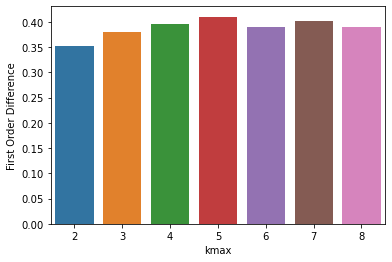

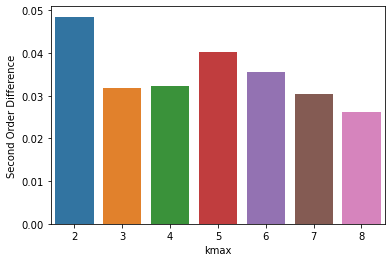

In [98]:
if __name__ == '__main__':
    # expDir = Path('./exp11')
    # loadAllJson(expDir)

    # allResultFilePathGen = Path('.').glob('*_allResults.csv')
    allResultFilePath = Path('./exp11_allResults.csv')
    allCoverageResultAverage(allResultFilePath)
    # allResultAverageCDF(allResultFilePath)
    # allResultAveragePose(allResultFilePath)
    # allFrameByFrame(allResultFilePath)
    # slvrAllPoseFrameByFrame(allResultFilePath)
    # NSAkmax(allResultFilePath)
    # NSA2kmax(allResultFilePath)
    # NSA_NSA2(allResultFilePath)
    # NSA_NSA2_NSA2Relaxed(allResultFilePath)
    # compareDS(allResultFilePathGen)
    # slvrNSANSA2FrameByFrame(allResultFilePath)
    # slvrNSANSA2AllPoseFrameByFrame(allResultFilePath)

    # resultFilePath1 = Path('./exp6_allResults.csv')
    # resultFilePath2 = Path('./exp7_allResults.csv')
    # diffKmaxCDF(resultFilePath1, resultFilePath2)

    # resultFilePath1 = Path('./exp5_allResults.csv')
    # resultFilePath2 = Path('./exp7_allResults.csv')
    # mergeCsv(resultFilePath1,resultFilePath2,'exp5_exp7')

    
    